## **Laptop Price Prediction**

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [100]:
df = pd.read_csv("laptopPrice.csv")
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


**Data Preprocessing**

In [101]:
df.shape

(823, 19)

In [102]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [103]:
df.dropna()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [104]:
df.info

<bound method DataFrame.info of       brand processor_brand processor_name processor_gnrtn ram_gb ram_type  \
0      ASUS           Intel        Core i3            10th   4 GB     DDR4   
1    Lenovo           Intel        Core i3            10th   4 GB     DDR4   
2    Lenovo           Intel        Core i3            10th   4 GB     DDR4   
3      ASUS           Intel        Core i5            10th   8 GB     DDR4   
4      ASUS           Intel   Celeron Dual   Not Available   4 GB     DDR4   
..      ...             ...            ...             ...    ...      ...   
818    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
819    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
820    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
821    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
822  Lenovo             AMD        Ryzen 5            10th   8 GB     DDR4   

         ssd      hdd       os  os_bit graphic_card_gb      weight  \
0       0 GB  1024 GB  Windows  64-bit            0 GB      Casual   
1       0 GB  1024 GB  Windows  64-bit            0 GB      Casual   
2       0 GB  1024 GB  Windows  64-bit            0 GB      Casual   
3     512 GB     0 GB  Windows  32-bit            2 GB      Casual   
4       0 GB   512 GB  Windows  64-bit            0 GB      Casual   
..       ...      ...      ...     ...             ...         ...   
818  1024 GB     0 GB  Windows  64-bit            0 GB      Casual   
819  1024 GB     0 GB  Windows  64-bit            0 GB      Casual   
820  1024 GB     0 GB  Windows  64-bit            4 GB      Casual   
821  1024 GB     0 GB  Windows  64-bit            4 GB      Casual   
822   512 GB     0 GB      DOS  64-bit            0 GB  ThinNlight   

        warranty Touchscreen msoffice   Price   rating  Number of Ratings  \
0    No warranty          No       No   34649  2 stars                  3   
1    No warranty          No       No   38999  3 stars                 65   
2    No warranty          No       No   39999  3 stars                  8   
3    No warranty          No       No   69990  3 stars                  0   
4    No warranty          No       No   26990  3 stars                  0   
..           ...         ...      ...     ...      ...                ...   
818       1 year          No       No  135990  3 stars                  0   
819       1 year          No       No  144990  3 stars                  0   
820       1 year          No       No  149990  3 stars                  0   
821       1 year          No       No  142990  3 stars                  0   
822  No warranty          No       No   57490  4 stars                 18   

     Number of Reviews  
0                    0  
1                    5  
2                    1  
3                    0  
4                    0  
..                 ...  
818                  0  
819                  0  
820                  0  
821                  0  
822                  4  

[823 rows x 19 columns]>

In [105]:
df.describe

<bound method NDFrame.describe of       brand processor_brand processor_name processor_gnrtn ram_gb ram_type  \
0      ASUS           Intel        Core i3            10th   4 GB     DDR4   
1    Lenovo           Intel        Core i3            10th   4 GB     DDR4   
2    Lenovo           Intel        Core i3            10th   4 GB     DDR4   
3      ASUS           Intel        Core i5            10th   8 GB     DDR4   
4      ASUS           Intel   Celeron Dual   Not Available   4 GB     DDR4   
..      ...             ...            ...             ...    ...      ...   
818    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
819    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
820    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
821    ASUS             AMD        Ryzen 9   Not Available   4 GB     DDR4   
822  Lenovo             AMD        Ryzen 5            10th   8 GB     DDR4   

         ssd      hdd       os  os_bit graphic_card_gb      weight  \
0       0 GB  1024 GB  Windows  64-bit            0 GB      Casual   
1       0 GB  1024 GB  Windows  64-bit            0 GB      Casual   
2       0 GB  1024 GB  Windows  64-bit            0 GB      Casual   
3     512 GB     0 GB  Windows  32-bit            2 GB      Casual   
4       0 GB   512 GB  Windows  64-bit            0 GB      Casual   
..       ...      ...      ...     ...             ...         ...   
818  1024 GB     0 GB  Windows  64-bit            0 GB      Casual   
819  1024 GB     0 GB  Windows  64-bit            0 GB      Casual   
820  1024 GB     0 GB  Windows  64-bit            4 GB      Casual   
821  1024 GB     0 GB  Windows  64-bit            4 GB      Casual   
822   512 GB     0 GB      DOS  64-bit            0 GB  ThinNlight   

        warranty Touchscreen msoffice   Price   rating  Number of Ratings  \
0    No warranty          No       No   34649  2 stars                  3   
1    No warranty          No       No   38999  3 stars                 65   
2    No warranty          No       No   39999  3 stars                  8   
3    No warranty          No       No   69990  3 stars                  0   
4    No warranty          No       No   26990  3 stars                  0   
..           ...         ...      ...     ...      ...                ...   
818       1 year          No       No  135990  3 stars                  0   
819       1 year          No       No  144990  3 stars                  0   
820       1 year          No       No  149990  3 stars                  0   
821       1 year          No       No  142990  3 stars                  0   
822  No warranty          No       No   57490  4 stars                 18   

     Number of Reviews  
0                    0  
1                    5  
2                    1  
3                    0  
4                    0  
..                 ...  
818                  0  
819                  0  
820                  0  
821                  0  
822                  4  

[823 rows x 19 columns]>

In [106]:
data = df.drop(columns=['Number of Ratings', 'Number of Reviews'])
df = pd.get_dummies(data)


In [107]:
df.isnull()

,Price,brand_APPLE,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,brand_acer,processor_brand_AMD,...,warranty_No warranty,Touchscreen_No,Touchscreen_Yes,msoffice_No,msoffice_Yes,rating_1 star,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
819,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
820,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
821,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [108]:
df.isnull().sum()

Price             0
brand_APPLE       0
brand_ASUS        0
brand_Avita       0
brand_DELL        0
                 ..
rating_1 star     0
rating_2 stars    0
rating_3 stars    0
rating_4 stars    0
rating_5 stars    0
Length: 78, dtype: int64

**Exploratory Data Analysis**

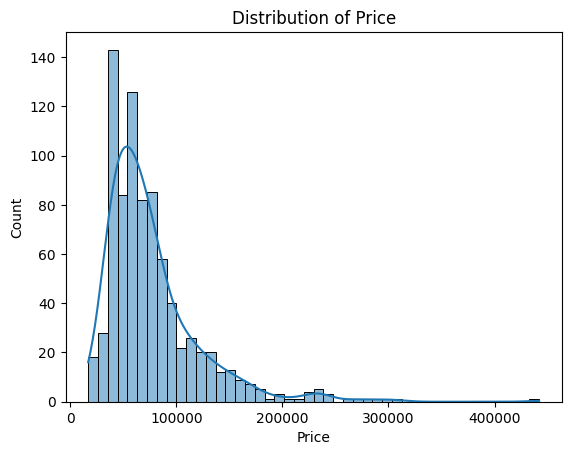

In [109]:
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

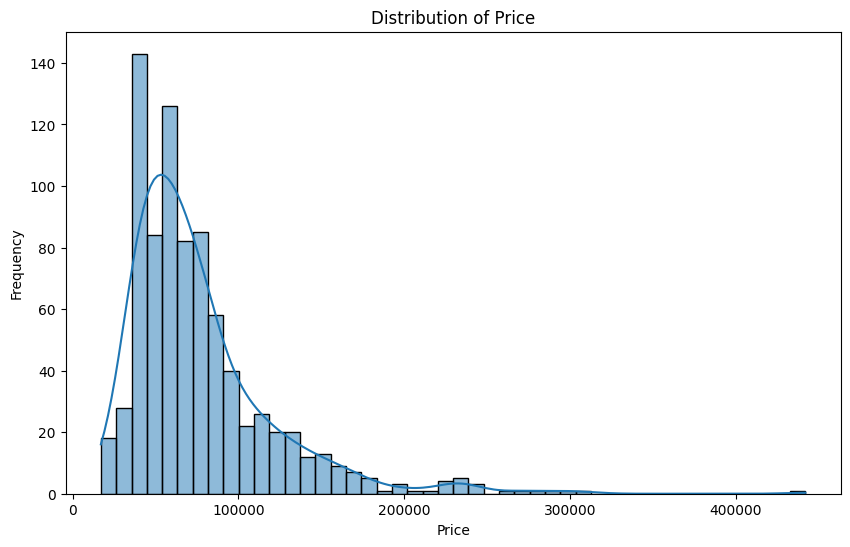

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

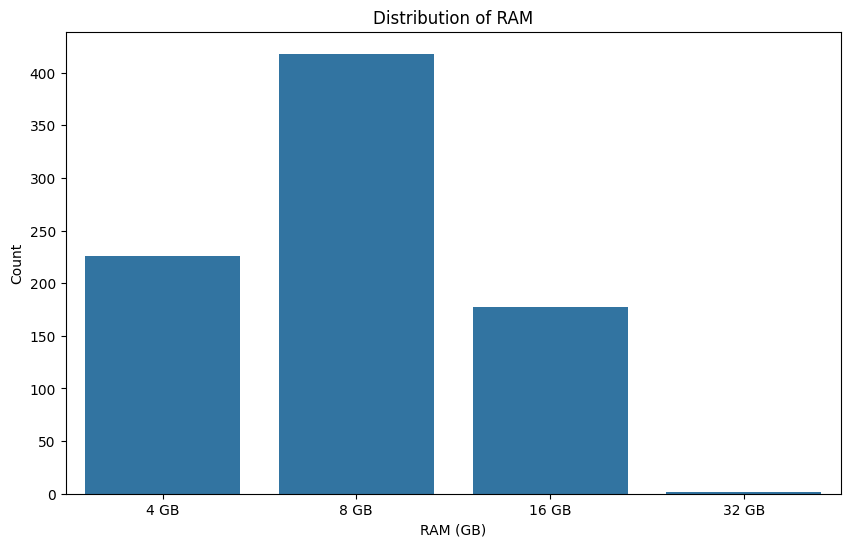

In [111]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ram_gb', data=data)
plt.title('Distribution of RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')
plt.show()

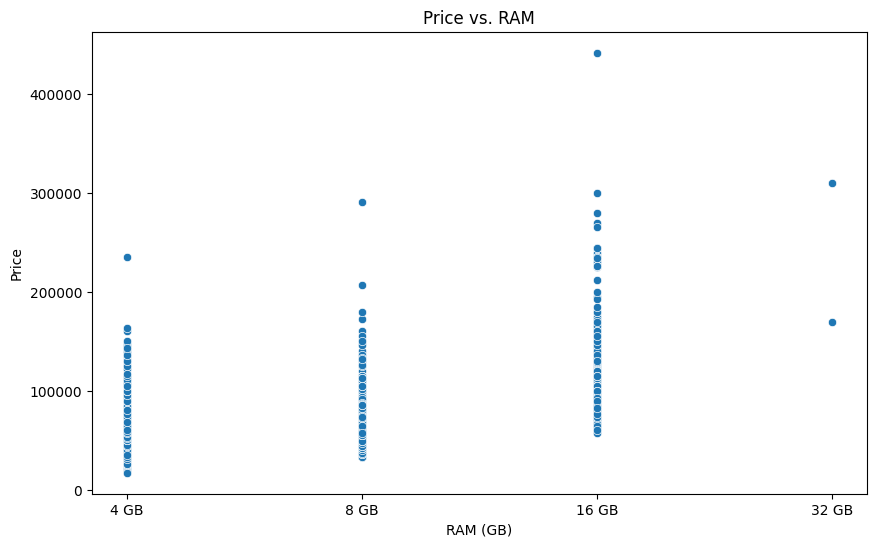

In [112]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ram_gb', y='Price', data=data)
plt.title('Price vs. RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.show()

**Model Building**

In [113]:
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
gb_regressor = GradientBoostingRegressor()

In [115]:
gb_regressor.fit(X_train, y_train)

GradientBoostingRegressor()

**Model Evaluation**

In [116]:
y_pred_train = gb_regressor.predict(X_train)

In [117]:
y_pred_test = gb_regressor.predict(X_test)

In [118]:
cv_scores = cross_val_score(gb_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE:", -cv_scores.mean())

Cross-Validation MSE: 1084536480.5838351


**Applying Random Forest**

In [119]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [120]:
y_pred_train_rf = rf_regressor.predict(X_train)
y_pred_test_rf = rf_regressor.predict(X_test)

mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)

mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)

r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print("\nRandom Forest Regressor:")
print("Mean Squared Error:", mse_train_rf)
print("Mean Absolute Error:", mae_train_rf)
print("R² Score:", r2_train_rf)


Random Forest Regressor:
Mean Squared Error (Train): 109004799.99510047
Mean Squared Error (Test): 847109644.6252016
Mean Absolute Error (Train): 5153.513912993922
Mean Absolute Error (Test): 14653.341007011675
R² Score (Train): 0.9468854469048346
R² Score (Test): 0.5653188474553668


In [121]:
cv_scores_rf = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE:", -cv_scores_rf.mean())

Cross-Validation MSE: 1140308074.9998791
